## Övning 1 Pandas Fundamentals

In [36]:

# 1.a) Create a Pandas Series from scratch

import pandas as pd

city = pd.DataFrame()

city= city.assign(Kommun = ["Malmö", "Stockholm", "Uppsala", "Göteborg"],
                Population = [347949, 975551, 233839, 583056])

city

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [37]:
# 1.b) Show the city with the index 3

gothenburg = city.iloc[[3]]

gothenburg

,Kommun,Population
3,Göteborg,583056


In [38]:
# 1.c) Sort the cities by population from largest to smallest

sorted_cities = city.sort_values("Population", ascending=False)

sorted_cities

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [39]:
# 1.d) Filter out the three largest cities

sorted_cities = city.sort_values("Population", ascending=False)

sorted_cities.head(3)

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [40]:
# 1.e) Assing population percentage to each city

sorted_cities["Population (%)"] = round(city["Population"] / 10379295 * 100, 1)

sorted_cities



,Kommun,Population,Population (%)
1,Stockholm,975551,9.4
3,Göteborg,583056,5.6
0,Malmö,347949,3.4
2,Uppsala,233839,2.3


## Övning 2 Real Dataset

In [41]:
# 2.a) Read in data from an Excel file

import pandas as pd
file = "../../Data/komtopp50_2020.xlsx"
df = pd.read_excel(file, header = 0, sheet_name="Totalt")

print(df.head()) # Visar de 5 första raderna
print(df.info()) # Visar information om data, som datatyp och antal saknade värden
print(df.describe()) #Visar en sammanfattning av data, som medelvärde och standardavvikelse



                                          Unnamed: 0  Unnamed: 1 Unnamed: 2  \
0                                                NaN         NaN        NaN   
1  Folkmängd per kommun 31 december 2020 jämfört ...         NaN        NaN   
2  Sorterat i alfabetisk ordning. Rangordning frå...         NaN        NaN   
3                                                NaN         NaN        NaN   
4                                               Rang         NaN     Kommun   

              Unnamed: 3  Unnamed: 4  Unnamed: 5  
0                    NaN         NaN         NaN  
1                    NaN         NaN         NaN  
2                    NaN         NaN         NaN  
3                    NaN         NaN         NaN  
4  Folkmängd 31 december         NaN  Förändring  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    

In [42]:
# 2.b) Change the column names and drop rows with missing values

df.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]

pd.to_numeric(df["Förändring"], errors="coerce")
df = df.dropna()
df["Folkmängd 2019"] = df["Folkmängd 2019"].astype(int)
df["Rang 2019"] = df["Rang 2019"].astype(int)

df.head().reset_index(drop=True)

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.34074


In [43]:
# 2.c) Filter out the five largest cities, from largest to smallest

sorted_cities = df.sort_values("Folkmängd 2020", ascending=False)

sorted_cities.head().reset_index(drop=True)

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.65167
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822


In [44]:
# 2.d) Assing population percentage to each city

sorted_smalest_city = df.sort_values("Folkmängd 2020")

sorted_smalest_city.set_index("Rang 2020")
sorted_smalest_city.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
18,290,290,Bjurholm,2387,2408,-0.872093
200,289,289,Sorsele,2442,2489,-1.888309
35,288,288,Dorotea,2498,2551,-2.077617
11,287,287,Arjeplog,2718,2785,-2.405745
277,286,286,Åsele,2805,2794,0.393701


In [45]:
# 2.e) Calculate the population in Sweden in 2019 and 2020

population_2019 = df["Folkmängd 2019"].sum()
population_2020 = df["Folkmängd 2020"].sum()

print(f"The population in Sweden in 2019 was {population_2019} and in 2020 was {population_2020}." ) # f-formatting string






The population in Sweden in 2019 was 10327589 and in 2020 was 10379295.


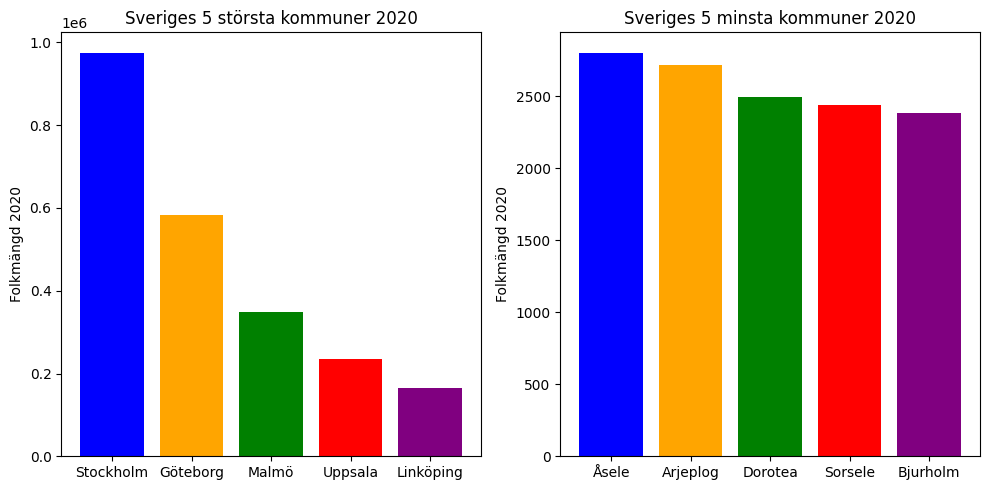

In [46]:
# 2.f) Plot the 5 largest cities, and the 5 smallest

import matplotlib.pyplot as plt

df_sorted = df.sort_values("Folkmängd 2020", ascending=False)
largest_cities = df_sorted.head(5)
smallest_cities = df_sorted.tail(5)


plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.bar(largest_cities["Kommun"], largest_cities["Folkmängd 2020"], color=["blue", "orange", "green", "red", "purple"])
plt.title("Sveriges 5 största kommuner 2020")
plt.ylabel("Folkmängd 2020")

plt.subplot(1, 2, 2)
plt.bar(smallest_cities["Kommun"], smallest_cities["Folkmängd 2020"], color=["blue", "orange", "green", "red", "purple"])
plt.title("Sveriges 5 minsta kommuner 2020")
plt.ylabel("Folkmängd 2020")
plt.tight_layout()
plt.show()



## Uppgift 3 Cities in Sweden - Gender

In [47]:


# 3.a) Create a function to format the new sheets.


# Läs in excelfilen
df_dict = pd.read_excel("../../Data/komtopp50_2020.xlsx", sheet_name=["Män", "Kvinnor"])

# Definiera funktionen för att rensa och om döpa kolumnerna
def rensa_och_omdöpa(df):
    # Rensa upp datan
    df = df.dropna()  # Ta bort rader med saknade värden
    df = df.drop_duplicates()  # Ta bort dubblettrader

    # Uppdatera namnen på kolumnerna
    df.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]

    df["Folkmängd 2019"] = df["Folkmängd 2019"].astype(int)
    df["Rang 2019"] = df["Rang 2019"].astype(int)
    
    return df

# Kör funktionen på DataFrame-objekten
df_kvinnor = pd.DataFrame(df_dict["Kvinnor"])  # Konvertera värdet till DataFrame
df_man = pd.DataFrame(df_dict["Män"])  # Konvertera värdet till DataFrame

df_kvinnor = rensa_och_omdöpa(df_kvinnor)
df_man = rensa_och_omdöpa(df_man)

df_man["Kön"] = "Man"
df_kvinnor["Kön"] = "Kvinna"


# Visa de uppdaterade DataFrame-objekten

df_man.head() # Visa de fem första raderna
print(df_man.head().reset_index(drop=True))
print(df_kvinnor.head().reset_index(drop=True))



  Rang 2020  Rang 2019    Kommun Folkmängd 2020  Folkmängd 2019 Förändring  \
0        81         83       Ale          16256           16054   1.258253   
1        64         64  Alingsås          20702           20646   0.271239   
2       122        123   Alvesta          10367           10339   0.270819   
3       255        255     Aneby           3503            3498   0.142939   
4       169        168    Arboga           7094            7114  -0.281136   

   Kön  
0  Man  
1  Man  
2  Man  
3  Man  
4  Man  
  Rang 2020  Rang 2019    Kommun Folkmängd 2020  Folkmängd 2019 Förändring  \
0        84         85       Ale          15612           15348   1.720094   
1        64         64  Alingsås          20900           20774   0.606527   
2       123        123   Alvesta           9857            9795   0.632976   
3       255        255     Aneby           3318            3350  -0.955224   
4       165        164    Arboga           6945            6973  -0.401549   

      Kö

In [48]:

# 3.b) Merge the two dataframes into one

df_merged = pd.concat([df_man, df_kvinnor])
df_merged.drop(["Rang 2020", "Rang 2019"], axis=1, inplace=True)
df_merged.set_index("Kommun")


df_merged

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
6,Ale,16256,16054,1.258253,Man
7,Alingsås,20702,20646,0.271239,Man
8,Alvesta,10367,10339,0.270819,Man
9,Aneby,3503,3498,0.142939,Man
10,Arboga,7094,7114,-0.281136,Man
...,...,...,...,...,...
291,Österåker,22997,22442,2.473042,Kvinna
292,Östhammar,10846,10803,0.398038,Kvinna
293,Östra Göinge,7270,7262,0.110162,Kvinna
294,Överkalix,1559,1578,-1.204056,Kvinna


In [49]:

# 3.c) 

df_total = pd.read_excel("../../Data/komtopp50_2020.xlsx", sheet_name="Totalt")

df.drop(["Rang 2020", "Rang 2019"], axis=1, inplace=True)
df.rename(columns={"Folkmängd 2020": "Total Pop 2020", "Folkmängd 2019": "Total Pop 2019", "Förändring": "Total Förändring"}, inplace=True)
df


,Kommun,Total Pop 2020,Total Pop 2019,Total Förändring
6,Ale,31868,31402,1.483982
7,Alingsås,41602,41420,0.439401
8,Alvesta,20224,20134,0.447005
9,Aneby,6821,6848,-0.394276
10,Arboga,14039,14087,-0.34074
...,...,...,...,...
291,Österåker,46644,45574,2.34783
292,Östhammar,22251,22250,0.004494
293,Östra Göinge,15017,15007,0.066636
294,Överkalix,3289,3315,-0.784314


In [50]:

#3.d) Merge the two dataframes into one


df_combined = pd.merge(df_merged, df, on="Kommun", how="outer").sort_values("Total Pop 2020", ascending=False)


df_combined





,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total Förändring
396,Stockholm,482982,482220,0.158019,Man,975551,974073,0.151734
397,Stockholm,492569,491853,0.145572,Kvinna,975551,974073,0.151734
114,Göteborg,292505,290308,0.756782,Man,583056,579281,0.65167
115,Göteborg,290551,288973,0.546072,Kvinna,583056,579281,0.65167
269,Malmö,175411,173543,1.07639,Kvinna,347949,344166,1.099179
...,...,...,...,...,...,...,...,...
59,Dorotea,1171,1195,-2.008368,Kvinna,2498,2551,-2.077617
388,Sorsele,1285,1319,-2.57771,Man,2442,2489,-1.888309
389,Sorsele,1157,1170,-1.111111,Kvinna,2442,2489,-1.888309
25,Bjurholm,1154,1159,-0.431406,Kvinna,2387,2408,-0.872093


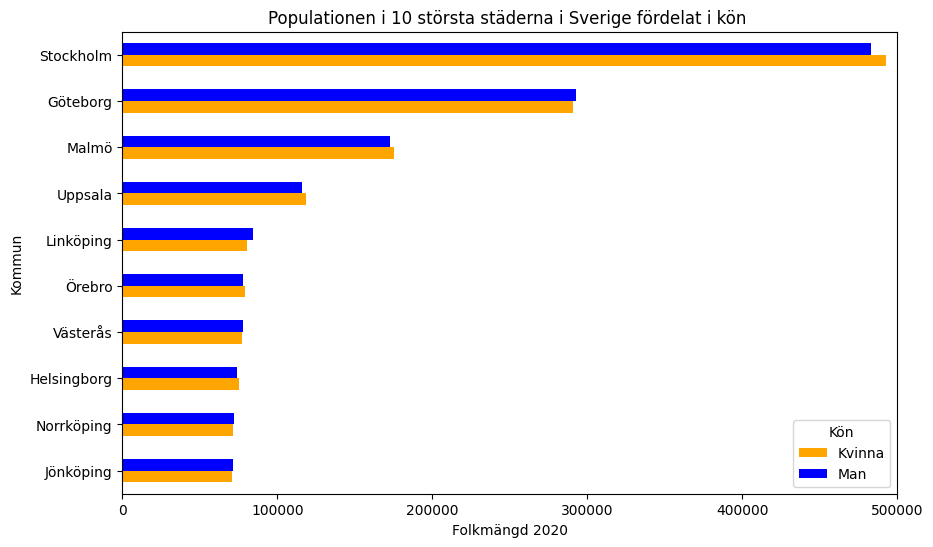

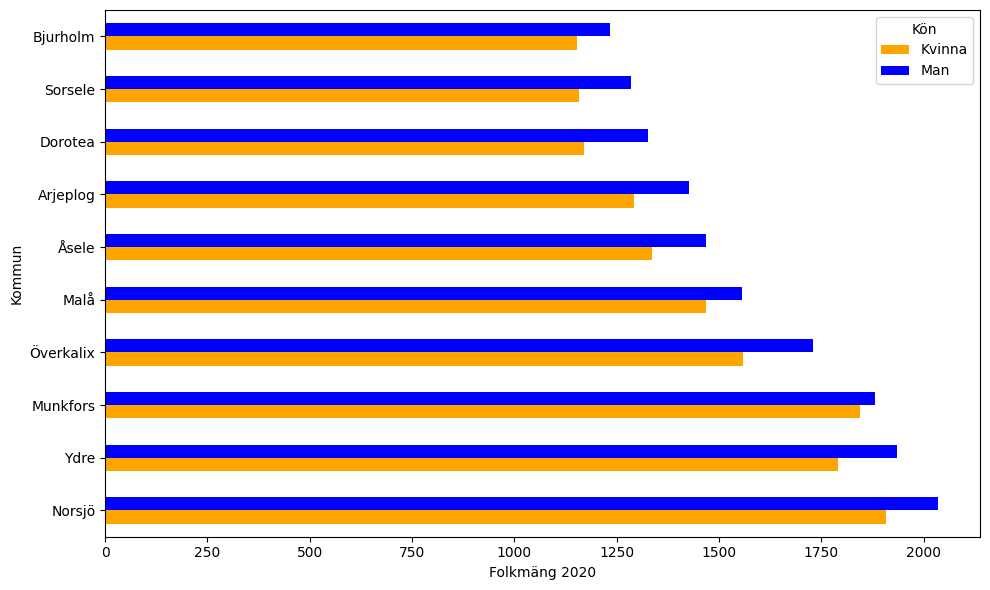

In [53]:
#3.e) Plotta de 10 största städerna samt de 10 minsta


df_grouped = df_combined.groupby(["Kommun", "Kön"])["Folkmängd 2020"].sum().unstack("Kön")

# Konvertera df_grouped till en numerisk typ
df_grouped = df_grouped.apply(pd.to_numeric, errors="coerce")
#Hämta de 10 minsta städerna 
top_10_minsta_städer = df_grouped.sum(axis=1).nsmallest(10).index
# Hämta de 10 största värdena
top_10_städer = df_grouped.sum(axis=1).nlargest(10).index
#Hämtad e minsta städerna
df_top_10_minsta = df_grouped.loc[top_10_minsta_städer]
# Filtrera dataframe för att bara inkludera de 10 största städerna
df_top_10 = df_grouped.loc[top_10_städer]

# Sortera dataframe i fallande ordning efter total folkmängd
df_top_10 = df_top_10.iloc[::-1]
df_top_10_minst =df_top_10_minsta.iloc[::-1]

# Skapa en bar plot för de 10 största städerna
df_top_10.plot(kind="barh", figsize=(10, 6), color=["orange", "blue"])
plt.title("Populationen i 10 största städerna i Sverige fördelat i kön ")
plt.xlabel("Folkmängd 2020")
plt.ylabel("Kommun")
plt.legend(title="Kön")
plt.xlim(0, 500000)  # Ange gränserna för x-axeln


df_top_10_minst.plot(kind="barh", figsize=(10,6), color=["orange","blue"])
plt.xlabel("Folkmäng 2020")
plt.ylabel("Kommun")
plt.legend(title="Kön")
plt.tight_layout()


plt.show()



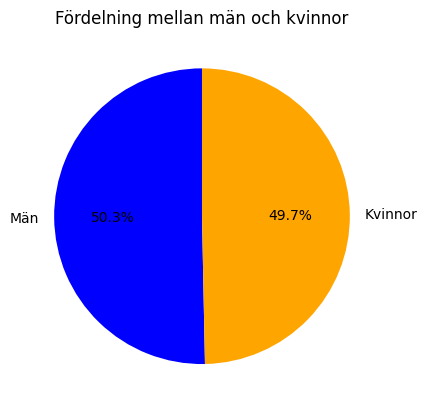

In [62]:
# 3.f) Plotta cirkeldiagram med andelen män och kvinnor

total_män = df_man["Folkmängd 2020"].sum()
total_kvinna = df_kvinnor["Folkmängd 2020"].sum()


values = [total_män, total_kvinna]
labels = ["Män", "Kvinnor"]

plt.pie (values, labels=labels, colors=["blue","orange"],startangle=90, autopct="%1.1f%%")
plt.title("Fördelning mellan män och kvinnor")
plt.show()

In [63]:
#3.g) Plotta de kommuner med störst skillnad mellan män och kvinnor

difference = df_combined["Man"] - df_combined["Kvinna"]

print(difference)


KeyError: 'Man'